In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi #Used in Radar Plots
import seaborn as sns
sns.set_style(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
fifatest=pd.read_csv("./players_20.csv")
fifatest

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [3]:
##FIND INDEX OF THE COLUMNS
{fifatest.columns.get_loc(col):col for col in  fifatest.columns}

{0: 'sofifa_id',
 1: 'player_url',
 2: 'short_name',
 3: 'long_name',
 4: 'age',
 5: 'dob',
 6: 'height_cm',
 7: 'weight_kg',
 8: 'nationality',
 9: 'club',
 10: 'overall',
 11: 'potential',
 12: 'value_eur',
 13: 'wage_eur',
 14: 'player_positions',
 15: 'preferred_foot',
 16: 'international_reputation',
 17: 'weak_foot',
 18: 'skill_moves',
 19: 'work_rate',
 20: 'body_type',
 21: 'real_face',
 22: 'release_clause_eur',
 23: 'player_tags',
 24: 'team_position',
 25: 'team_jersey_number',
 26: 'loaned_from',
 27: 'joined',
 28: 'contract_valid_until',
 29: 'nation_position',
 30: 'nation_jersey_number',
 31: 'pace',
 32: 'shooting',
 33: 'passing',
 34: 'dribbling',
 35: 'defending',
 36: 'physic',
 37: 'gk_diving',
 38: 'gk_handling',
 39: 'gk_kicking',
 40: 'gk_reflexes',
 41: 'gk_speed',
 42: 'gk_positioning',
 43: 'player_traits',
 44: 'attacking_crossing',
 45: 'attacking_finishing',
 46: 'attacking_heading_accuracy',
 47: 'attacking_short_passing',
 48: 'attacking_volleys',
 49:

In [4]:
fifatest.drop(fifatest.columns[78:],axis=1,inplace=True)



In [5]:
fifatest.drop(['team_jersey_number','nation_jersey_number','sofifa_id','long_name','nationality','club','release_clause_eur','player_tags', 'team_jersey_number','loaned_from','joined',
  'contract_valid_until','nation_jersey_number','mentality_aggression', 'mentality_interceptions', 'mentality_positioning','mentality_penalties'],axis=1,inplace=True)

In [6]:
fifatest.drop(['player_url','wage_eur'],axis = 1,inplace = True)

In [7]:
fifatest.drop(['dob'],axis = 1,inplace = True)
fifatest.drop(['preferred_foot'],axis = 1,inplace = True)


In [8]:
fifatest.drop(['short_name'],axis = 1,inplace = True)


In [9]:
fifatest

,age,height_cm,weight_kg,overall,potential,value_eur,player_positions,international_reputation,weak_foot,skill_moves,...,mentality_vision,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,"RW, CF, ST",5,4,4,...,94,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,"ST, LW",5,4,5,...,82,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,"LW, CAM",5,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,GK,3,3,1,...,65,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,"LW, CF",4,4,4,...,89,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,40000,CB,1,3,2,...,25,41,45,50,52,5,5,13,5,14
18274,22,177,66,48,56,40000,CB,1,2,2,...,25,35,42,53,57,13,6,14,11,9
18275,19,186,75,48,56,40000,CM,1,2,2,...,38,39,46,52,46,7,8,10,6,14
18276,18,185,74,48,54,40000,CM,1,2,2,...,48,40,39,44,54,14,9,13,13,13


In [10]:
fifatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   overall                     18278 non-null  int64  
 4   potential                   18278 non-null  int64  
 5   value_eur                   18278 non-null  int64  
 6   player_positions            18278 non-null  object 
 7   international_reputation    18278 non-null  int64  
 8   weak_foot                   18278 non-null  int64  
 9   skill_moves                 18278 non-null  int64  
 10  work_rate                   18278 non-null  object 
 11  body_type                   18278 non-null  object 
 12  real_face                   18278 non-null  object 
 13  team_position               180

In [11]:
fifatest['gk_diving']=fifatest.gk_diving.fillna(fifatest.gk_diving.mean())
fifatest['gk_handling']=fifatest.gk_handling.fillna(fifatest.gk_handling.mean())
fifatest['gk_kicking']=fifatest.gk_kicking.fillna(fifatest.gk_kicking.mean())
fifatest['gk_reflexes']=fifatest.gk_reflexes.fillna(fifatest.gk_reflexes.mean())
fifatest['gk_speed']=fifatest.gk_speed.fillna(fifatest.gk_speed.mean())
fifatest['gk_positioning']=fifatest.gk_positioning.fillna(fifatest.gk_positioning.mean())
fifatest['pace']=fifatest.pace.fillna(fifatest.pace.mean())
fifatest['shooting']=fifatest.shooting.fillna(fifatest.shooting.mean())
fifatest['passing']=fifatest.passing.fillna(fifatest.passing.mean())
fifatest['defending']=fifatest.defending.fillna(fifatest.defending.mean())
fifatest['physic']=fifatest.physic.fillna(fifatest.physic.mean())
fifatest['dribbling']=fifatest.dribbling.fillna(fifatest.dribbling.mean())

In [12]:
fifatest['nation_position']=fifatest.nation_position.fillna(fifatest.nation_position.value_counts().index[0])
fifatest['team_position']=fifatest.team_position.fillna(fifatest.team_position.value_counts().index[0])

In [13]:
fifatest.player_positions=pd.Categorical(fifatest.player_positions,['CB',
'ST',     
'CM',     
'GK',     
'CDM',    
'RB',     'LB',   'CAM'    
'RM',     
'LM',      
'LW',      'RW',      
'CF',      
'LWB',      
'RWB'])

In [14]:
fifatest.player_positions=fifatest.player_positions.cat.codes

In [15]:
fifatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   overall                     18278 non-null  int64  
 4   potential                   18278 non-null  int64  
 5   value_eur                   18278 non-null  int64  
 6   player_positions            18278 non-null  int8   
 7   international_reputation    18278 non-null  int64  
 8   weak_foot                   18278 non-null  int64  
 9   skill_moves                 18278 non-null  int64  
 10  work_rate                   18278 non-null  object 
 11  body_type                   18278 non-null  object 
 12  real_face                   18278 non-null  object 
 13  team_position               182

<AxesSubplot:>

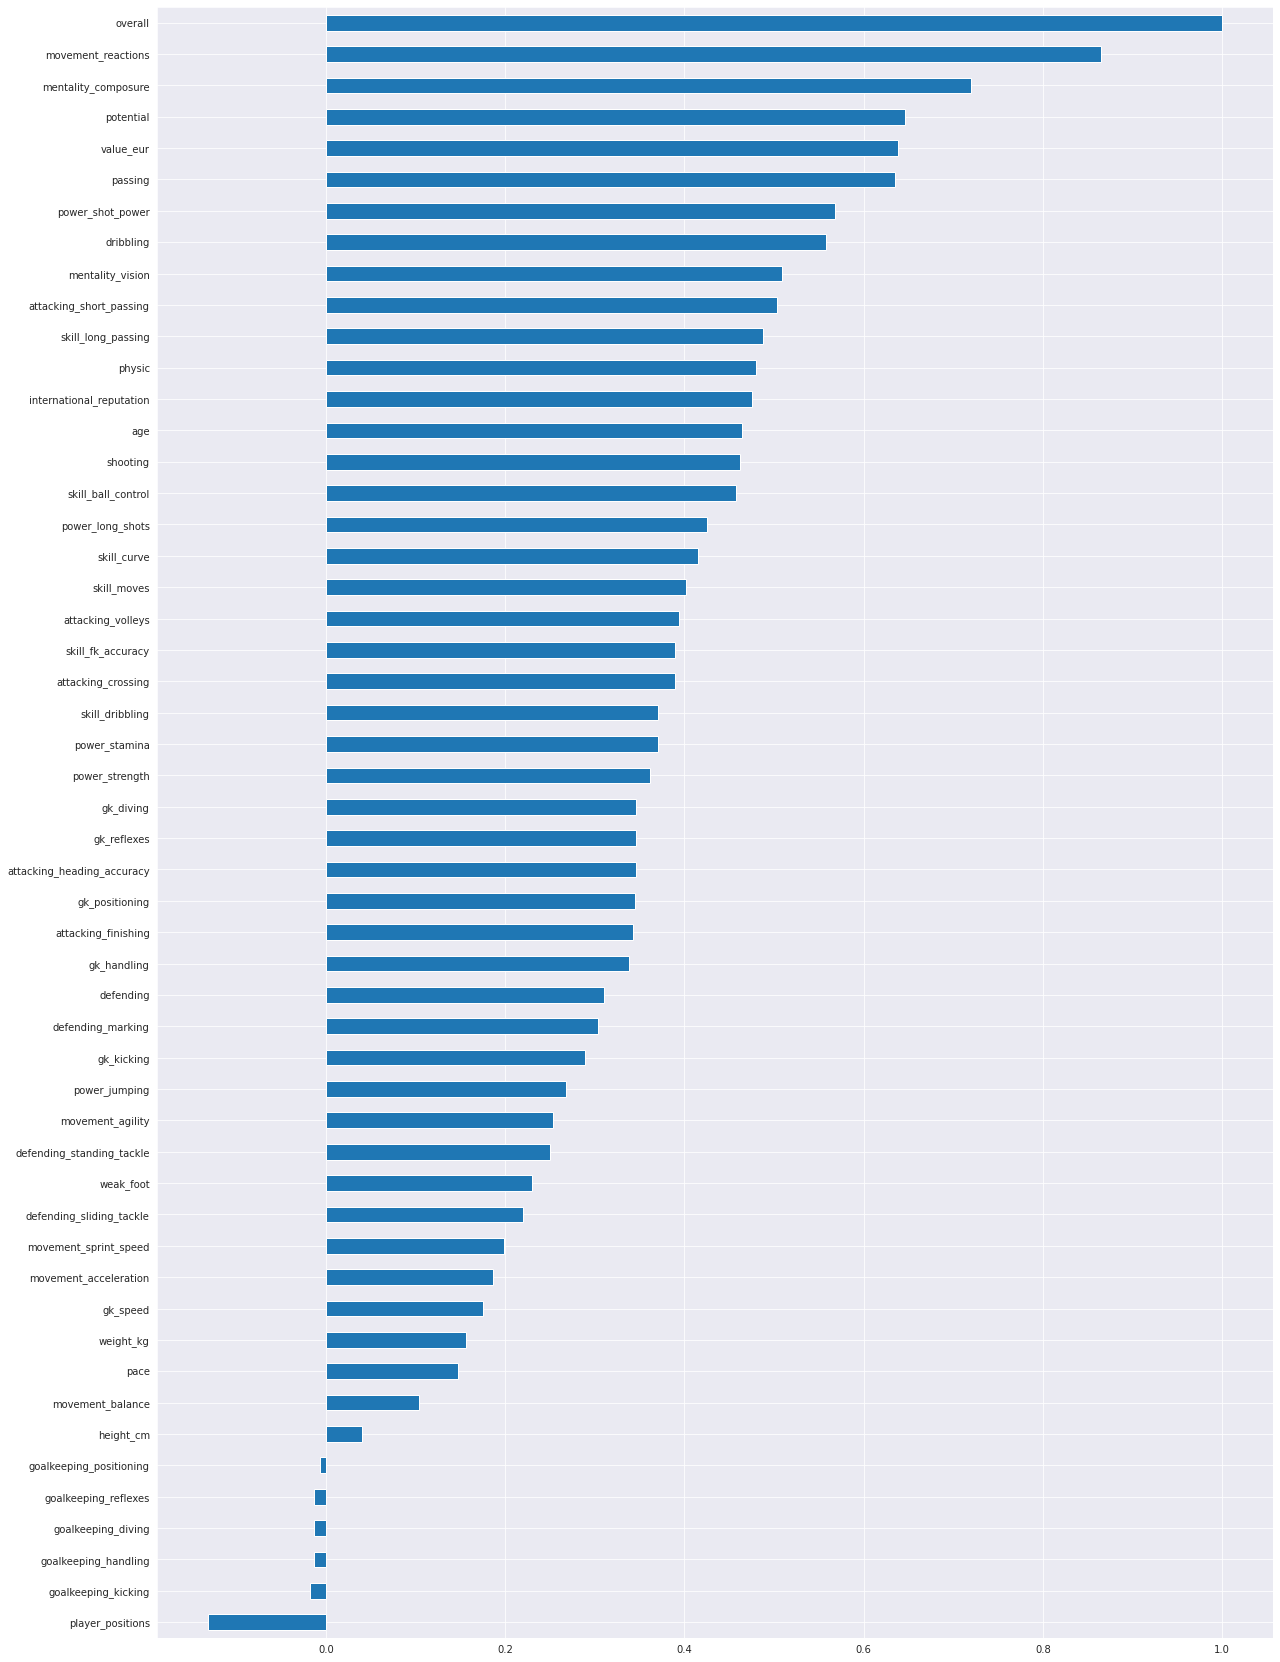

In [16]:
corr_matrix = fifatest.corr()

corr_matrix['overall'].sort_values(ascending = True).plot.barh(figsize=(20,30))

In [17]:
y = fifatest.overall
feature_columns = ['movement_reactions','potential','value_eur','power_shot_power','attacking_short_passing','skill_long_passing','passing',  'dribbling','player_positions','attacking_volleys','mentality_composure','mentality_vision','physic']

X = fifatest[feature_columns]
#feature_columns = ['Best Overall Rating','Reactions','Composure','Potential','ShortPassing','ShotPower','Dribbling'

In [18]:
scaler = StandardScaler()
scaler.fit_transform(X)


array([[ 3.63942377,  3.65715595, 16.65362498, ...,  3.15400647,
         2.89427041,  0.12209709],
       [ 3.7488885 ,  3.49427626, 10.02912625, ...,  3.06983504,
         2.03437862,  1.42641116],
       [ 3.31102959,  3.33139658, 18.44403004, ...,  2.98566361,
         2.60763982, -0.74744563],
       ...,
       [-1.0675596 , -2.53227203, -0.43758174, ..., -1.64376521,
        -1.11855795, -1.50829551],
       [-0.84863014, -2.8580314 , -0.43758174, ..., -1.55959378,
        -0.40198146, -1.39960267],
       [-1.39595378, -3.34667045, -0.43758174, ..., -1.39125091,
        -0.11535086, -1.07352415]])

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movement_reactions       18278 non-null  int64  
 1   potential                18278 non-null  int64  
 2   value_eur                18278 non-null  int64  
 3   power_shot_power         18278 non-null  int64  
 4   attacking_short_passing  18278 non-null  int64  
 5   skill_long_passing       18278 non-null  int64  
 6   passing                  18278 non-null  float64
 7   dribbling                18278 non-null  float64
 8   player_positions         18278 non-null  int8   
 9   attacking_volleys        18278 non-null  int64  
 10  mentality_composure      18278 non-null  int64  
 11  mentality_vision         18278 non-null  int64  
 12  physic                   18278 non-null  float64
dtypes: float64(3), int64(9), int8(1)
memory usage: 1.7 MB


In [20]:
#Splitting dataset(Random state ensures same split everytime)
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2, random_state = 0)

In [21]:
col = train_X.columns[train_X.columns.duplicated()]
col

Index([], dtype='object')

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1)
model.fit(train_X, train_y)
preds = model.predict(val_X)
print(mean_absolute_error(val_y, preds))

0.7007658643326039


In [24]:
predictions = model.predict(val_X)
print("The predictions are")
print(model.predict(X.head(10)))

The predictions are
[92. 93. 92. 91. 91. 90. 90. 90. 85. 91.]


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [50,100,500], 'max_features': [2, 8,10,50, 100],'random_state':[50, 100,200,],
 'max_depth':[20, 50, 100, 500,],
},

]
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [20, 50, 100, 500],
                          'max_features': [2, 8, 10, 50, 100],
                          'n_estimators': [50, 100, 500],
                          'random_state': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:

grid_search.best_params_


{'max_depth': 50, 'max_features': 8, 'n_estimators': 500, 'random_state': 200}

0.6931072210065645


DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [25]:
predictions = model.predict(val_X)
print("The predictions are")
print(model.predict(X.head(10)))



The predictions are
[92. 93. 92. 91. 91. 90. 90. 90. 85. 91.]


In [26]:
print(mean_absolute_error(val_y, predictions))

0.7007658643326039


In [27]:
df = pd.read_csv('./FIFA21_official_data.csv')


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

In [29]:

feature_columns = ['Best Overall Rating','Reactions','Potential','ShortPassing','ShotPower','Dribbling','Vision','LongPassing','International Reputation', 'Value','Stamina','Marking','Composure','Agility']
            

In [30]:
df = df[feature_columns]

In [31]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Best Overall Rating       17108 non-null  float64
 1   Reactions                 17108 non-null  float64
 2   Potential                 17108 non-null  int64  
 3   ShortPassing              17108 non-null  float64
 4   ShotPower                 17108 non-null  float64
 5   Dribbling                 17108 non-null  float64
 6   Vision                    17108 non-null  float64
 7   LongPassing               17108 non-null  float64
 8   International Reputation  17108 non-null  float64
 9   Value                     17108 non-null  object 
 10  Stamina                   17108 non-null  float64
 11  Marking                   17108 non-null  float64
 12  Composure                 17108 non-null  float64
 13  Agility                   17108 non-null  float64
dtypes: flo

In [32]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [33]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

In [34]:
y_pred = df['Best Overall Rating']
X_pred = df.drop('Best Overall Rating',axis=1)

In [35]:
prediction = model.predict(X_pred)

In [36]:
mean_absolute_error(y_pred, prediction)

3.2916764086976853

In [37]:
import pickle
pickle.dump(model, open('princess.pkl', 'wb'))